In [1]:
from feature_extraction import LowLevelFeat

Using TensorFlow backend.
/home/akhil/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [18]:
mini = 99999
maxi = 0
sumi = 0
for i in mfcc.values():
    if mini > i.shape[1]:
        mini = i.shape[1]
    if maxi < i.shape[1]:
        maxi = i.shape[1]
    sumi += i.shape[1]
print mini
print maxi
print float(sumi)/float(4936)

54
3409
452.878646677


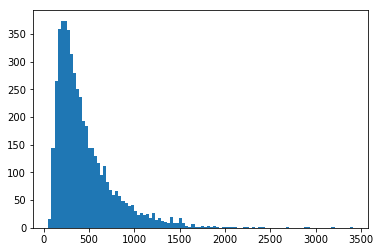

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(np.array([i.shape[1] for i in mfcc.values()]), bins=100)
plt.show()

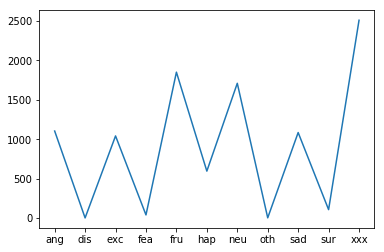

In [9]:
import matplotlib.pyplot as plt
import numpy as np
a = ['ang', 'dis', 'exc', 'fea', 'fru', 'hap', 'neu', 'oth', 'sad', 'sur', 'xxx']
b = [np.sum(np.array(data.id2label.values())==i) for i in a]
plt.plot(np.array(a), np.array(b))
plt.show()

In [2]:
llf = LowLevelFeat()
llf.feat_extract('lpcc', 200)
llf.feat_extract('rmfcc', 200)
llf.feat_extract('mfcc', 200)
llf.feat_extract('VQ')
llf.feat_extract('mfcc', 250)
llf.feat_extract('lpcc', 250)
llf.feat_extract('rmfcc', 250)
llf.feat_extract('mfcc', 300)
llf.feat_extract('lpcc', 300)
llf.feat_extract('rmfcc', 300)
llf.feat_extract('mfcc', 150)
llf.feat_extract('lpcc', 150)
llf.feat_extract('rmfcc', 150)
llf.feat_extract('zcr', 100)

7380
0
1000
2000
3000
4000
5000
6000
7000
0
1000
2000
3000
4000
5000
6000
7000
0
1000
2000
3000
4000
5000
6000
7000
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
0
1000
2000
3000
4000
5000
6000
7000
0
1000
2000
3000
4000
5000
6000
7000


IOError: [Errno 28] No space left on device

In [4]:
import pickle
with open('../feat/VQ_100.pkl') as f:
    vq = pickle.load(f)

In [7]:
data = vq
vq.keys()

['dim', 'cat', 'feat', 'id', 'subject']

In [13]:
data['feat']

[[0.02788,
  0.000158896,
  0.01528,
  0.04584,
  0.12625,
  1.242,
  0.0634,
  0.08183,
  0.12611,
  0.1902,
  0.49091,
  0.884965,
  0.160731,
  11.722],
 [0.0202,
  8.6528e-05,
  0.00969,
  0.029060000000000002,
  0.14878,
  1.396,
  0.06705,
  0.08732,
  0.11391,
  0.20116,
  0.30033000000000004,
  0.872239,
  0.180775,
  10.908],
 [0.03406,
  0.000191273,
  0.01561,
  0.04682000000000001,
  0.16591999999999998,
  1.467,
  0.08093,
  0.11800000000000001,
  0.19233,
  0.24279,
  0.50377,
  0.809074,
  0.292415,
  7.831],
 [0.021640000000000003,
  0.000144614,
  0.01061,
  0.03183,
  0.11895,
  1.112,
  0.05854,
  0.08048999999999999,
  0.10704000000000001,
  0.17562999999999998,
  0.5470900000000001,
  0.835879,
  0.250876,
  8.987],
 [0.049729999999999996,
  0.000253624,
  0.030539999999999998,
  0.09162000000000001,
  0.19299,
  1.571,
  0.11359,
  0.13028,
  0.18026,
  0.34078,
  0.5,
  0.767502,
  0.359847,
  6.499],
 [0.16763000000000003,
  0.000834214,
  0.13631000000000001,
 

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score,recall_score
from sklearn.svm import SVC
import numpy as np

weighted_recall=[] # collect accuracies from all folds
unweighted_recall=[]
acc = []

subject_ids = list(set(data['subject']))
print len(subject_ids)

for i in range (0,len(subject_ids)):
    # define train and test sets
    features_test = []
    features_train = []
    labels_train = []
    labels_test = []
    for j in range(len(data['subject'])):
        if data['subject'][j] == subject_ids[i]:
            features_test.append(np.array(data['feat'][j][5:14]))
            labels_test.append(data['cat'][j])
        else:
            features_train.append(np.array(data['feat'][j][5:14]))
            labels_train.append(data['cat'][j])

    #print np.array(features_train)[0:10]
    #print np.array(labels_train)[0:10]
    # train a classifier
    rf = SVC(kernel='poly')
    rf = rf.fit(np.array(features_train),np.array(labels_train))
    ypred = rf.predict(np.array(features_test))
    weighted_recall.append(accuracy_score(np.array(labels_test),np.array(ypred)))
    unweighted_recall.append(recall_score(np.array(labels_test),ypred, average='macro')) # unweighted accuracy!
    acc.append(accuracy_score(np.array(labels_test), ypred))
    #print acc

print weighted_recall,unweighted_recall
print np.mean(weighted_recall),np.mean(unweighted_recall)
print acc

10
[0.2662337662337662, 0.2975420439844761, 0.30633802816901406, 0.28851540616246496, 0.3193033381712627, 0.2956259426847662, 0.25960061443932414, 0.3124087591240876, 0.3491204330175913, 0.3127962085308057] [0.21825855047149142, 0.21994842854217853, 0.23414855072463767, 0.25016587418382086, 0.24144401350283703, 0.2214949678187038, 0.23509074322958892, 0.23343560556904766, 0.24726290700803444, 0.23545491334908927]
0.3007484540517559 0.23367045543994297
[0.2662337662337662, 0.2975420439844761, 0.30633802816901406, 0.28851540616246496, 0.3193033381712627, 0.2956259426847662, 0.25960061443932414, 0.3124087591240876, 0.3491204330175913, 0.3127962085308057]


NameError: name 'size' is not defined